In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

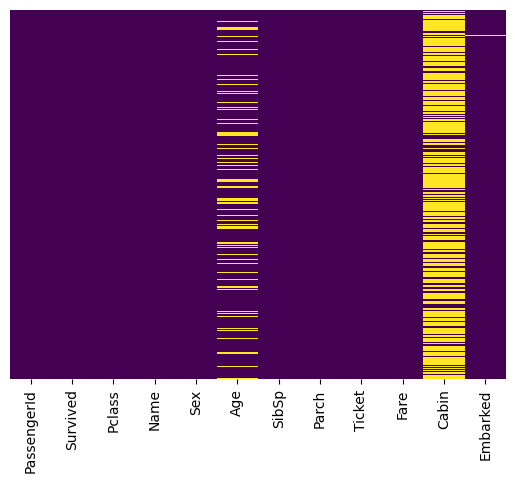

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
percentage_data = df.notnull().mean() * 100

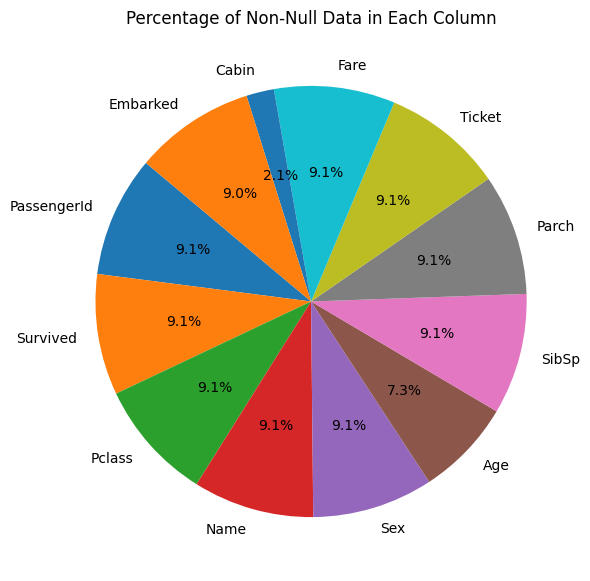

In [ ]:
plt.figure(figsize=(10, 7))
plt.pie(percentage_data, labels=percentage_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Non-Null Data in Each Column')
plt.show()

<Axes: xlabel='Age'>

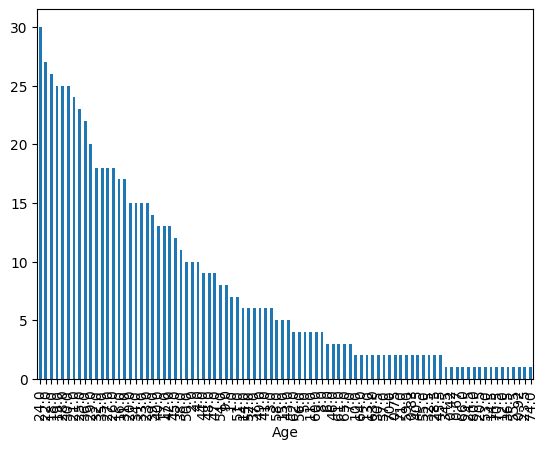

In [ ]:
df['Age'].value_counts().plot(kind='bar')

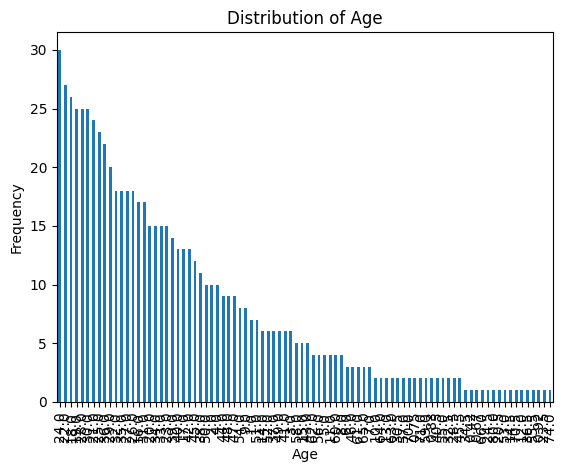

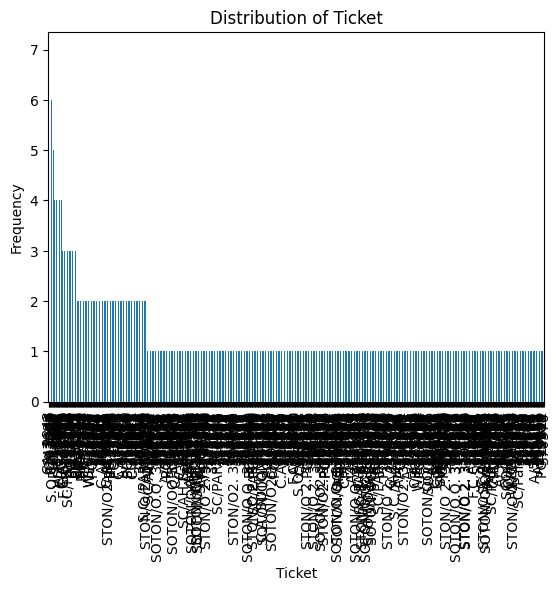

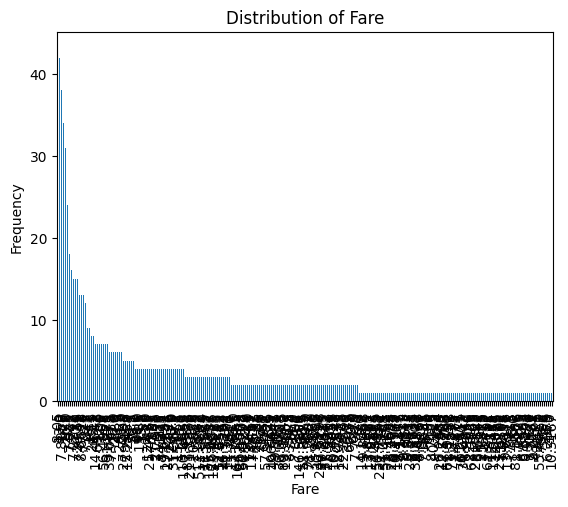

In [ ]:

# List of columns to plot
columns_to_plot = ['Age', 'Ticket', 'Fare']  # Add your other columns here

# Plotting each column
for column in columns_to_plot:
    df[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
#df['Your age?']=df['Your age?'].fillna(df['Your age?'].mean())

In [ ]:
def fill_null_with_random(df, column_name):
    # Count the number of null values in the specified column
    null_count = df[column_name].isnull().sum()

    # Generate random values from the non-null values in the column
    random_values = df[column_name].dropna().sample(null_count, replace=True)

    # Replace null values with random values
    df.loc[df[column_name].isnull(), column_name] = random_values.values

    return df

df = fill_null_with_random(df, "Age")

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
def get_dummies_for_categorical(df):

  categorical_cols = df.select_dtypes(include=['object']).columns

  df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_')

  for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
      df_encoded[col] = df_encoded[col].astype(int)

  return df_encoded

df_encoded = get_dummies_for_categorical(df)

df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,19.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
df_encoded.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      int64
Sex_male        int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,25.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
df_encoded.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

<Axes: >

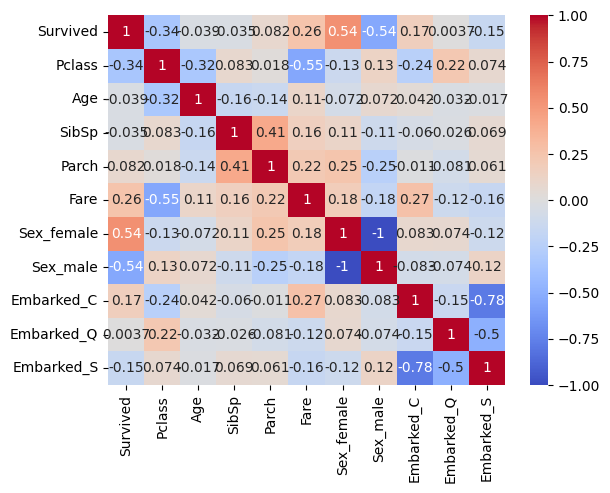

In [ ]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

In [ ]:
X = df_encoded.drop(columns=['Survived'])
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,19.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
y = df_encoded['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector_chi2 = SelectKBest(chi2, k=10)

In [ ]:
X_train_chi2 = selector_chi2.fit_transform(X_train, y_train)
X_test_chi2 = selector_chi2.transform(X_test)


In [ ]:
c

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_chi2, y_train)

RandomForestClassifier()

In [ ]:
y_pred_chi2 = rf.predict(X_test_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
print(f"Accuracy (chi2): {accuracy_chi2}")

Accuracy (chi2): 0.8156424581005587


In [ ]:
print(f"Selected features (chi2): {X_train.columns[selector_chi2.get_support()]}")

Selected features (chi2): Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


<Axes: >

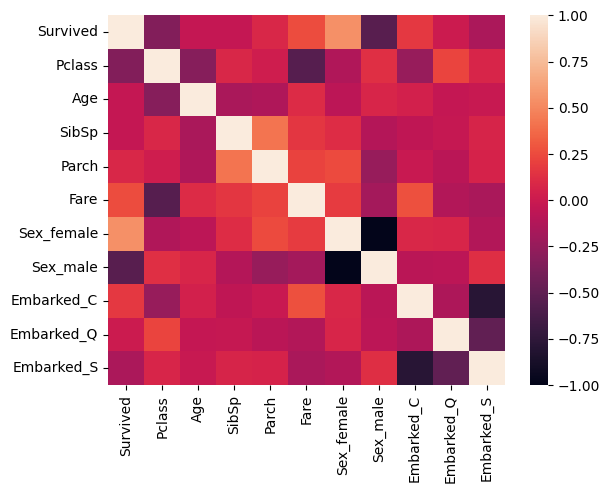

In [ ]:
sns.heatmap(df_encoded.corr())

In [ ]:
def remove_outliers_zscore(df, column, threshold=3):
  # Calculate Z-scores for the column
  z = np.abs((df[column] - df[column].mean()) / df[column].std())

  # Identify outliers
  outliers = df[z > threshold]

  # Remove outliers
  df_cleaned = df[z <= threshold]

  return df_cleaned

df_cleaned = remove_outliers_zscore(df, 'price')

print(f"Original data:\n{df}\n")
print(f"Cleaned data:\n{df_cleaned}")

outlier_columns = ['column1', 'column2', 'column3']
for column in outlier_columns:
    df = remove_outliers_zscore(df, column)
print(df)

Selected features (chi2): Index(['Pclass', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
select = SelectKBest(score_func=chi2)

In [ ]:
b_select=select.fit(x,y)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


In [ ]:
b_select.scores_

array([3.08736994e+01, 9.27024470e+01, 3.15785487e+01, 2.58186538e+00,
       1.00974991e+01, 4.51831909e+03, 1.02025247e+01])

In [ ]:
pd.DataFrame(b_select.scores_,columns=['Score'])

,Score
0,30.873699
1,92.702447
2,31.578549
3,2.581865
4,10.097499
5,4518.319091
6,10.202525


In [ ]:
c_score = pd.DataFrame(b_select.scores_,columns=['Score'])

In [ ]:
c_col = pd.DataFrame(x.columns)

In [ ]:
rank = pd.concat([c_col,c_score],axis=1)

In [ ]:
rank.nlargest(5,'Score')

,0,Score
5,Fare,4518.319091
1,Sex,92.702447
2,Age,31.578549
0,Pclass,30.873699
6,Embarked,10.202525


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(x,y)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


SelectKBest()

In [ ]:
fs = pd.DataFrame(fit_features.scores_,index=x.columns, columns = ['score values'])
fs

,score values
Pclass,115.031272
Sex,372.405724
Age,4.403500
SibSp,1.110572
Parch,5.963464
Fare,63.030764
Embarked,25.717286


In [ ]:
sp = fs.nlargest(5,'score values')
sp

,score values
Sex,372.405724
Pclass,115.031272
Fare,63.030764
Embarked,25.717286
Parch,5.963464


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
xinput = ['Fare','Sex','Pclass','Age','Embarked']

In [ ]:
X = df[xinput]

In [ ]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
#model = LinearRegression()
# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier()

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(xtest)

In [ ]:
accuracy_score(ytest,y_pred)

0.8212290502793296

In [ ]:
X.dtypes

Fare        float64
Sex           int64
Pclass        int64
Age         float64
Embarked      int64
dtype: object

In [ ]:
Y.dtypes

dtype('int64')

In [ ]:
testdata = pd.read_csv("test.csv")
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
testdata.drop(['PassengerId','Name','Cabin','Ticket'],axis=1, inplace=True)
testdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
def fill_null_with_random(df, column_name):
    # Count the number of null values in the specified column
    null_count = df[column_name].isnull().sum()

    # Generate random values from the non-null values in the column
    random_values = df[column_name].dropna().sample(null_count, replace=True)

    # Replace null values with random values
    df.loc[df[column_name].isnull(), column_name] = random_values.values

    return df

testdata = fill_null_with_random(testdata, "Age")

In [ ]:
testdata['Fare']=testdata['Fare'].fillna(testdata['Fare'].mean())

In [ ]:
testdata.isnull().sum()

NameError: name 'testdata' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns = testdata.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    testdata[col] = label_encoders[col].fit_transform(testdata[col])
testdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,28.0,0,0,8.0500,2


In [ ]:
testdf = ['Fare','Sex','Pclass','Age','Embarked']

In [ ]:
testcol = testdata[xinput]

In [ ]:
Xtrain

,Fare,Sex,Pclass,Age,Embarked
331,28.5000,1,1,45.5,2
733,13.0000,1,2,23.0,2
382,7.9250,1,3,32.0,2
704,7.8542,1,3,26.0,2
813,31.2750,0,3,6.0,2
...,...,...,...,...,...
106,7.6500,0,3,21.0,2
270,31.0000,1,1,40.0,2
860,14.1083,1,3,41.0,2
435,120.0000,0,1,14.0,2


In [ ]:
testcol

,Fare,Sex,Pclass,Age,Embarked
0,7.8292,1,3,34.5,1
1,7.0000,0,3,47.0,2
2,9.6875,1,2,62.0,1
3,8.6625,1,3,27.0,2
4,12.2875,0,3,22.0,2
...,...,...,...,...,...
413,8.0500,1,3,27.0,2
414,108.9000,0,1,39.0,0
415,7.2500,1,3,38.5,2
416,8.0500,1,3,60.0,2


In [ ]:
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred = rf.predict(testdata)
from sklearn.metrics import accuracy_score
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
sample_data = pd.read_csv("sample.csv")
sample_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
sample_data['Survived']=y_pred

In [ ]:
sample_data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [ ]:
sample_data.to_csv("file.csv", index=False)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [179, 418]

In [ ]:
# Calculate metrics
mse = mean_squared_error(Ytest, y_pred)
rmse = mean_squared_error(Ytest, y_pred, squared=False)  # Root MSE
mae = mean_absolute_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

/home/sakibnjr/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Output scores
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1557.636510770778
Root Mean Squared Error (RMSE): 39.466903992722536
Mean Absolute Error (MAE): 12.170289050279331
R-squared (R2): -0.006596029448688867
